# **Project Name: World Population Analysis**

Contribution - Dinesh Halder

# **Project Overview**

* This project aims to analyze global population trends using historical demographic data and forecast future growth patterns.
* we will explore key factors influencing population changes by using machine learning.
* identifing significant trends, and develop predictive models to estimate future population dynamics.

# **Code [EDA]**

## 1.  **----*Know Your Data*----**

### **Import Library**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score

### **Dataset Loading**

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Link and load data set

data_set=pd.read_csv("/content/drive/MyDrive/project internship/world_population.csv",encoding = "ISO-8859-1") # # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte


### **Dataset OverView**

In [ ]:
display(data_set)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El AaiÃºn,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


In [ ]:
# Columns names

print(data_set.columns.tolist())


['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (kmÂ²)', 'Density (per kmÂ²)', 'Growth Rate', 'World Population Percentage']


* **Dataset Rows & Columns count**

In [ ]:
num_rows, num_cols= data_set.shape
print(f"Total no. of Rows: {num_rows}")
print(f"Total no. of Columns: {num_cols}")

Total no. of Rows: 234
Total no. of Columns: 17


* **DataSet Information**

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (kmÂ²)         

* **Missing Values/Null Values**

In [ ]:
data_set.isnull().sum()

,0
Rank,0
CCA3,0
Country/Territory,0
Capital,0
Continent,0
2022 Population,0
2020 Population,0
2015 Population,0
2010 Population,0
2000 Population,0


* **Duplicate Value**

In [ ]:
duplicate_count= data_set.duplicated().sum()

In [ ]:
print(f"Total no. of duplicate Rows: {duplicate_count}")

Total no. of duplicate Rows: 0


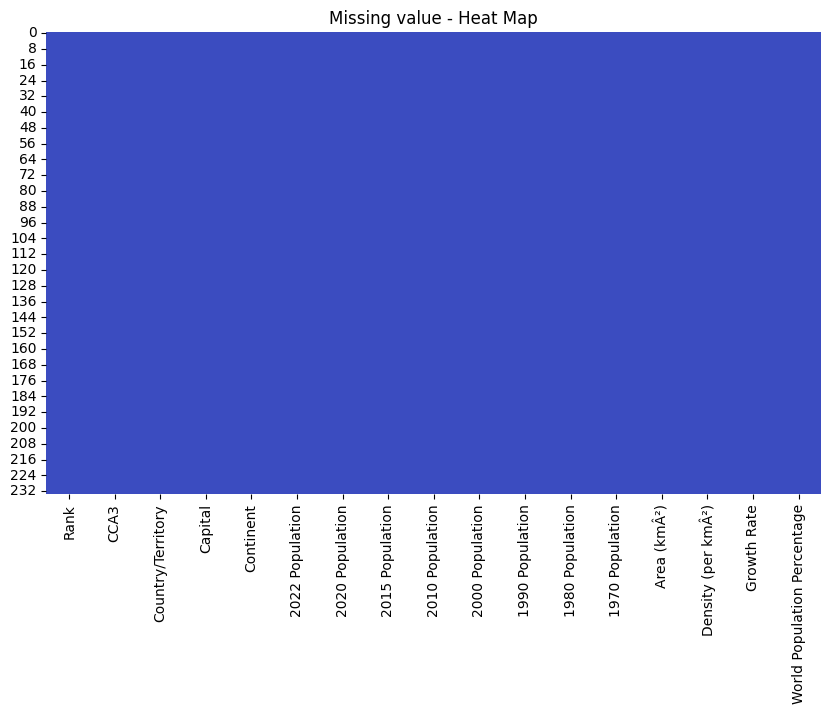

In [ ]:
# Visualizing the missing values using heat map

plt.figure(figsize=(10,6))
sns.heatmap(data_set.isnull(),cbar= False,cmap= 'coolwarm')

plt.title("Missing value - Heat Map")
plt.show()

### **What did we know about Data?**

1. The DataSet comprises of 234 Rows and 17 Columns.
2. No null value is present in the DataSet.
3. No duplicate value is present.
4. Four(4) attributes (CCA3, Country/Territory, Capital, Continent) are object data types and the rests are int or float data type.

## 2. ***----Understanding Variables----***

In [ ]:
# Know Columns

column_name= list(data_set.columns)

print("Columns\n")
for i in range(len(column_name)):
  print(f"{i+1}. {column_name[i]}")


Columns

1. Rank
2. CCA3
3. Country/Territory
4. Capital
5. Continent
6. 2022 Population
7. 2020 Population
8. 2015 Population
9. 2010 Population
10. 2000 Population
11. 1990 Population
12. 1980 Population
13. 1970 Population
14. Area (kmÂ²)
15. Density (per kmÂ²)
16. Growth Rate
17. World Population Percentage


In [ ]:
# Data Set Describe

data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,234.0,1.175000e+02,6.769417e+01,1.0000,59.250000,1.175000e+02,1.757500e+02,2.340000e+02
2022 Population,234.0,3.407441e+07,1.367664e+08,510.0000,419738.500000,5.559944e+06,2.247650e+07,1.425887e+09
2020 Population,234.0,3.350107e+07,1.355899e+08,520.0000,415284.500000,5.493074e+06,2.144798e+07,1.424930e+09
2015 Population,234.0,3.172996e+07,1.304050e+08,564.0000,404676.000000,5.307400e+06,1.973085e+07,1.393715e+09
2010 Population,234.0,2.984524e+07,1.242185e+08,596.0000,393149.000000,4.942770e+06,1.915957e+07,1.348191e+09
2000 Population,234.0,2.626947e+07,1.116982e+08,651.0000,327242.000000,4.292907e+06,1.576230e+07,1.264099e+09
1990 Population,234.0,2.271022e+07,9.783217e+07,700.0000,264115.750000,3.825410e+06,1.186923e+07,1.153704e+09
1980 Population,234.0,1.898462e+07,8.178519e+07,733.0000,229614.250000,3.141146e+06,9.826054e+06,9.823725e+08
1970 Population,234.0,1.578691e+07,6.779509e+07,752.0000,155997.000000,2.604830e+06,8.817329e+06,8.225344e+08
Area (kmÂ²),234.0,5.814494e+05,1.761841e+06,1.0000,2650.000000,8.119950e+04,4.304258e+05,1.709824e+07


Check the unique values for each variables

In [ ]:
for i in data_set.columns.tolist():
  print(f"Total unique values in {i} : {data_set[i].nunique()}")

Total unique values in Rank : 234
Total unique values in CCA3 : 234
Total unique values in Country/Territory : 234
Total unique values in Capital : 234
Total unique values in Continent : 6
Total unique values in 2022 Population : 234
Total unique values in 2020 Population : 234
Total unique values in 2015 Population : 234
Total unique values in 2010 Population : 234
Total unique values in 2000 Population : 234
Total unique values in 1990 Population : 234
Total unique values in 1980 Population : 234
Total unique values in 1970 Population : 234
Total unique values in Area (kmÂ²) : 233
Total unique values in Density (per kmÂ²) : 234
Total unique values in Growth Rate : 180
Total unique values in World Population Percentage : 70


### **Variable Description**

1. Rank : Ranking of countries regarding population.
2. CCA3: initial alphabet of countries .
3. Country/Territory: Name of the country.
4. Capital: Defines the capital of the specific country.
5. Continent: Specifies the continent in which the country belongs to.
6. 2022 Population: Total Population of the country in 2022.
7. 2020 Population: Total Population of the country in 2020.
8. 2015 Population: Total Population of the country in 2015.
9. 2010 Population: Total Population of the country in 2010.
10. 2000 Population: Total Population of the country in 2000.
11. 1990 Population: Total Population of the country in 1990.
12. 1980 Population: Total Population of the country in 1980.
13. 1970 Population: Total Population of the country in 1970.
14. Area (kmÂ²): Area size of the Country/Territories in square kilometer.
15. Density (per kmÂ²): Population Density per square kilometer.
16. Growth Rate: Population Growth Rate by Country/Territories.
17. World Population Percentage: The population percentage by each Country/Territories.

## 3. ***----Data Wrangling----***

* We are going to change the attributes name for simploification.
* We are going to delete the CCA3 attribute.

In [ ]:
df= data_set.copy()

In [ ]:
df=df.drop(['CCA3'],axis=1)
df.head(5)

,Rank,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
0,36,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [ ]:
df.rename(columns={'Area (kmÂ²)': 'area','Density (per kmÂ²)': 'density', 'World Population Percentage':'population%', '2022 Population':'2022','2020 Population':'2020','2015 Population':'2015','2010 Population':'2010','2000 Population':'2000','1990 Population':'1990','1980 Population':'1980','1970 Population':'1970','Country/Territory':'country'}, inplace=True)

In [ ]:
df.head(2)

,Rank,country,Capital,Continent,2022,2020,2015,2010,2000,1990,1980,1970,area,density,Growth Rate,population%
0,36,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04


## 4. ***----Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables----***

### 1. **Correlation Heatmap**

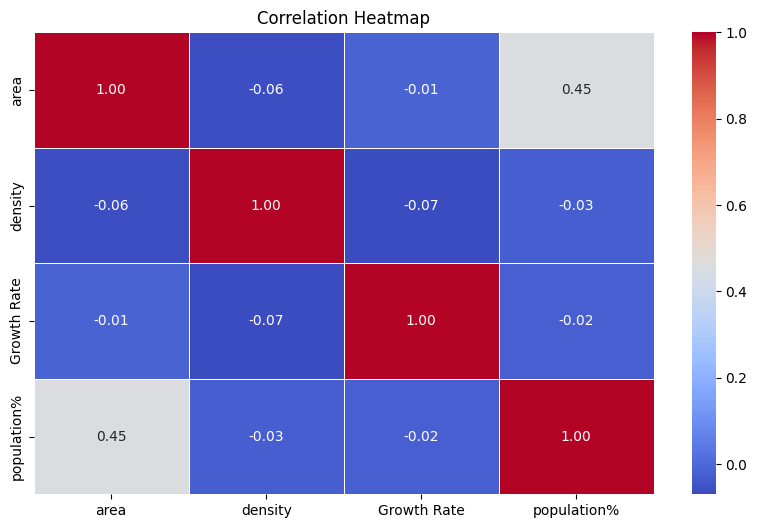

In [ ]:
# Correlation Heatmap visualization code

selected_cols= ['area', 'density', 'Growth Rate', 'population%']
corr_matrix= df[selected_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot= True,cmap="coolwarm",fmt= ".2f",linewidths= 0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix.T

,area,density,Growth Rate,population%
area,1.000000,-0.063128,-0.013970,0.453284
density,-0.063128,1.000000,-0.069753,-0.027646
Growth Rate,-0.013970,-0.069753,1.000000,-0.020930
population%,0.453284,-0.027646,-0.020930,1.000000


**Insight(s):**



* There is a positive correlation between 'Area' and 'World Population Percentage' (0.45)





### 2. **Pair Plot**

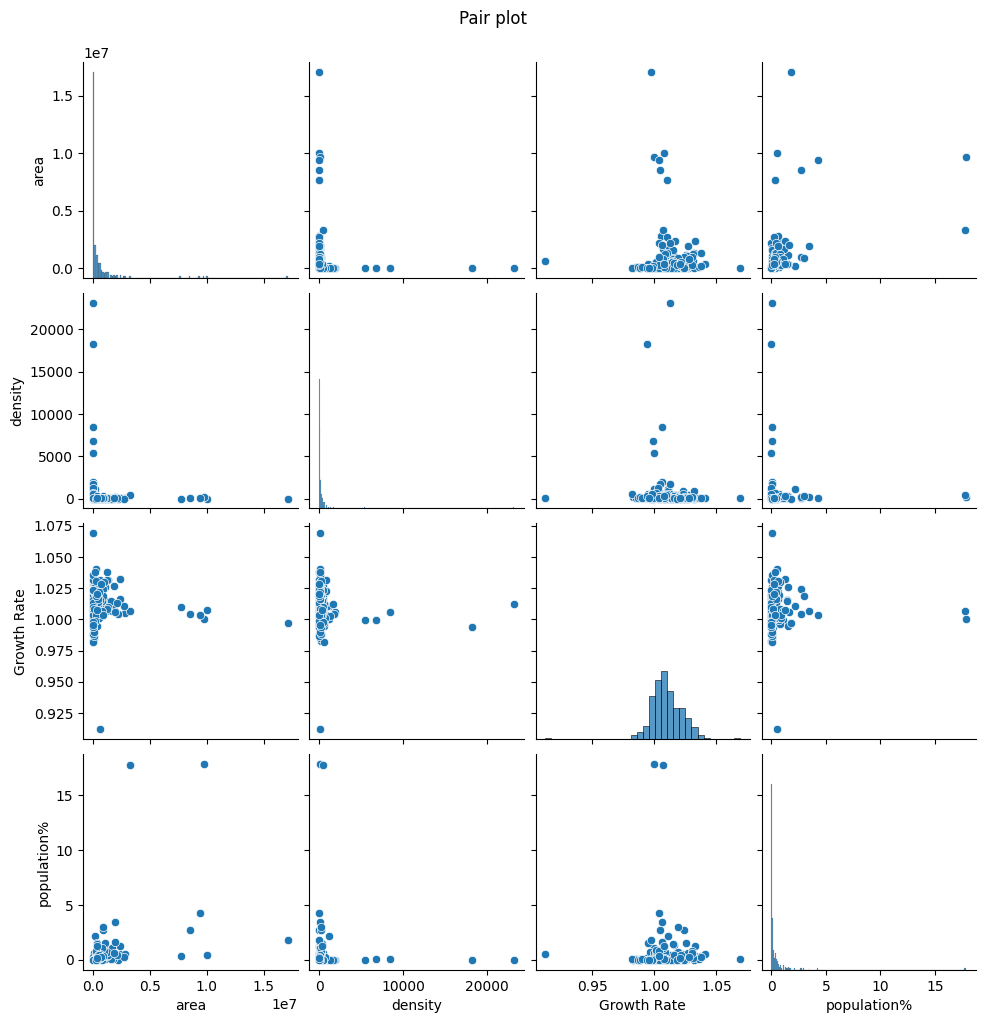

In [ ]:
# Pair plot

sns.pairplot(df[selected_cols])
plt.suptitle("Pair plot",y= 1.02)
plt.show()

Insight(s):


*   Shows most countries have a small area, while a few have very large areas.
*   Most countries have a low population density, with a few having very high densities.
* Most countries have a growth rate around 1.00, indicating stable population sizes.
* Most countries contribute a very small percentage to the world population, with a few contributing significantly more.



### 3. **Box Plot**

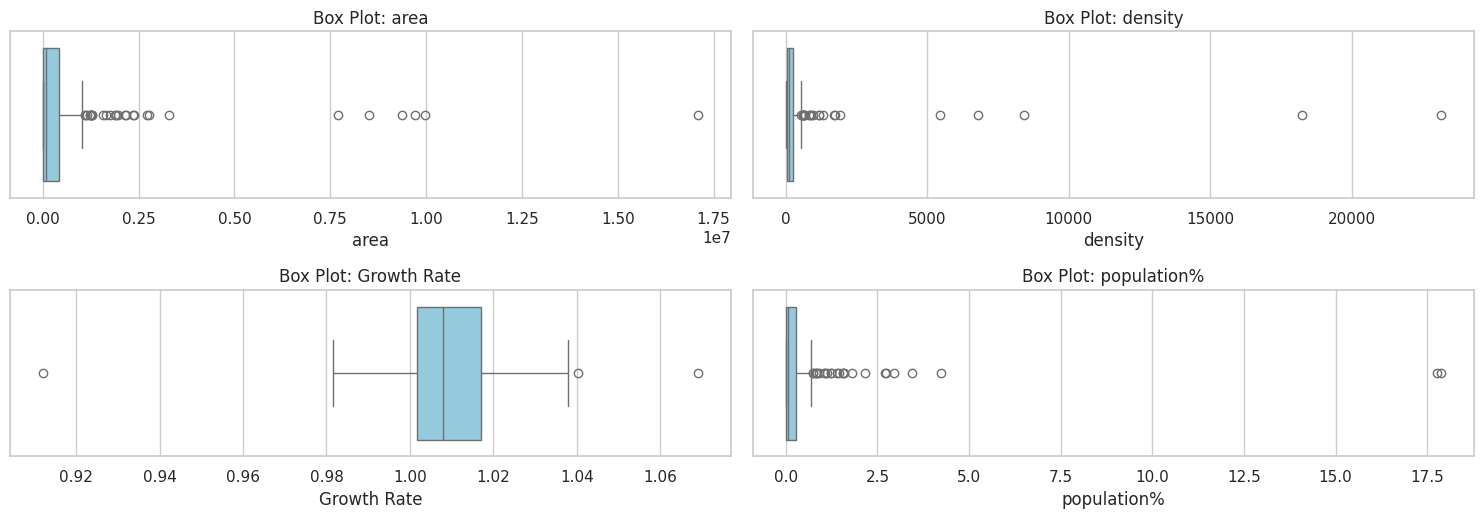

In [ ]:
# Create box plots for each variable
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

for i, variable in enumerate(selected_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[variable], color='skyblue')
    plt.title(f'Box Plot: {variable}')

plt.tight_layout()
plt.show()

**Insight(s):**


1. Area (km²): The majority of countries have small areas, with several outliers having very large areas. This indicates a wide variation in country sizes.

2. Density (per km²): Most countries have low population density, with a few countries having very high densities. This suggests that while most countries are sparsely populated, a few are densely populated.

3. Growth Rate: The growth rate for most countries centers around 1.0, indicating stable population sizes. There are a few outliers with significantly higher or lower growth rates, showing that some countries are experiencing rapid population changes.

4. World Population Percentage: The percentage of the world population is mostly concentrated at the lower end, with one significant outlier at around 17.5%. This highlights that while most countries contribute a small percentage to the world population, a few have a much larger share.


### 4. **Population trend over the year**

In [ ]:
def top5_population(df):
  # Selection of top 5 most populous countries in 2022
  top_5= df.nlargest(5, "2022")

  # Columns for years
  years= ["1970", "1980", "1990", "2000", "2010", "2015", "2020", "2022"]

  # Convert population columns to numeric values
  top_5[years]= top_5[years].apply(pd.to_numeric, errors= 'coerce')
  # Transform data for seaborn
  top_5_melted = top_5.melt(id_vars=['country'], value_vars=years, var_name='Year', value_name='Population')
  top_5_melted['Year']= top_5_melted['Year'].str.extract('(\d+)').astype(int)

  # Plot the data using seaborn
  plt.figure(figsize=(12, 6))

  sns.lineplot(data=top_5_melted, x='Year', y='Population', hue='country', marker='o')

  plt.xlabel("Year")
  plt.ylabel("Population")
  plt.title("Top 5 Most Populous Countries Over Time")
  plt.xticks(rotation=45)
  plt.legend(title='Country')
  plt.grid(True)
  plt.show()



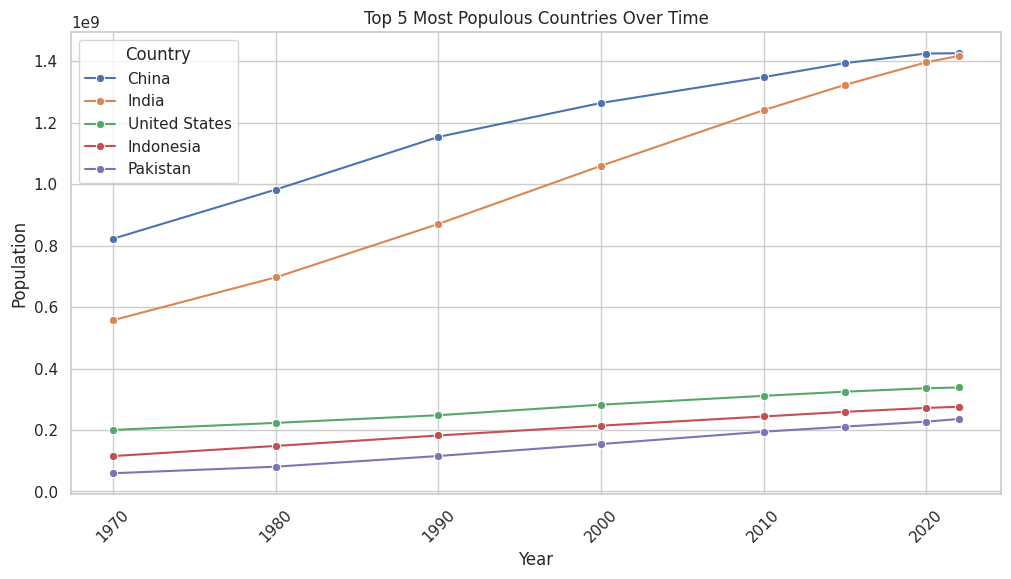

In [ ]:
top5_population(df)

In [ ]:
top5_populated= df.nlargest(5, '2022')[['country', '2022']]
print(top5_populated)


           country        2022
41           China  1425887337
92           India  1417173173
221  United States   338289857
93       Indonesia   275501339
156       Pakistan   235824862


**Insight(s):**

**1. India & China Are Nearly Equal in Population (2022):**
* China (1.42B) and India (1.41B) together account for over 35% of the world's population.
* India is expected to surpass China as the most populous country soon due to its higher growth rate.

**2. The U.S. Is the Most Populous Western Country:**
* The United States, with 338 million, is the third most populous country.
However, its population is much lower than India and China.

**3. Indonesia:**
* Indonesia has 275 million people, making it the 4th most populous nation.

**4. Pakistan’s Rapid Growth:**
* Pakistan’s 235 million population places it 5th.

**5. Population Disparity:**
* The difference between the 2nd (India) and 3rd (USA) ranked country is over 1 billion people!
* This shows the massive population concentration in Asia compared to the rest of the world.

### 5. **Growth rate over the year**

In [ ]:
top5_growth= df.nlargest(5, "Growth Rate")
pattern_growth= top5_growth[["country", "Growth Rate"]].reset_index(drop= True)
print(pattern_growth)

    country  Growth Rate
0   Moldova       1.0691
1    Poland       1.0404
2     Niger       1.0378
3     Syria       1.0376
4  Slovakia       1.0359


<ipython-input-27-bbca28c500d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Growth Rate", y="country", data=pattern_growth, palette="viridis")


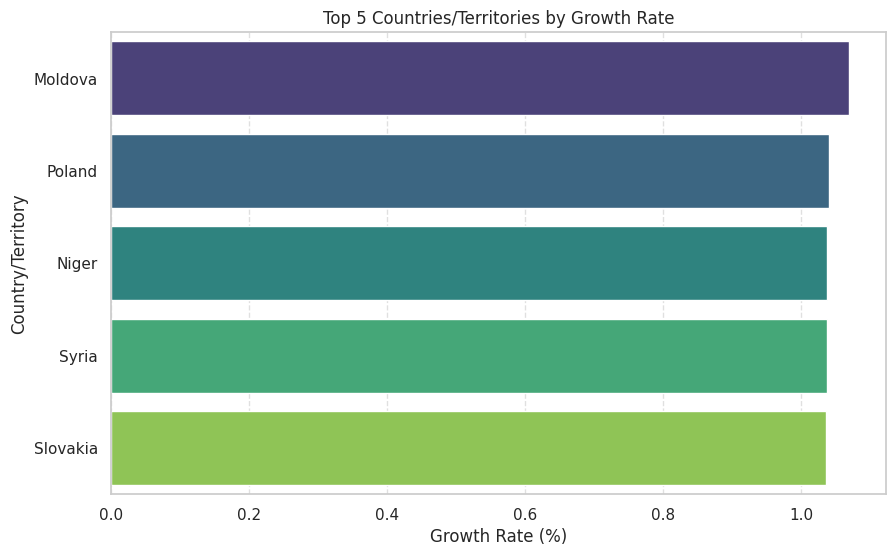

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x="Growth Rate", y="country", data=pattern_growth, palette="viridis")

plt.xlabel("Growth Rate (%)")
plt.ylabel("Country/Territory")
plt.title("Top 5 Countries/Territories by Growth Rate")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

**Insight(s):**

Moldova & Poland Lead in Growth:
* Unlike China & India, which have stabilizing populations, Moldova (1.0691) and Poland (1.0404) show notable growth.
* Followed by Niger, Syria, Slovakia.

### 6. **Area Analysis (Country)**

In [ ]:
top10_area= df.nlargest(10, "area")
pattern_area= top10_area[["country", "area"]].reset_index(drop= True)
print(pattern_area)

         country      area
0         Russia  17098242
1         Canada   9984670
2          China   9706961
3  United States   9372610
4         Brazil   8515767
5      Australia   7692024
6          India   3287590
7      Argentina   2780400
8     Kazakhstan   2724900
9        Algeria   2381741


<ipython-input-29-a26544eb391b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="country", y="area", data= pattern_area, palette="viridis")


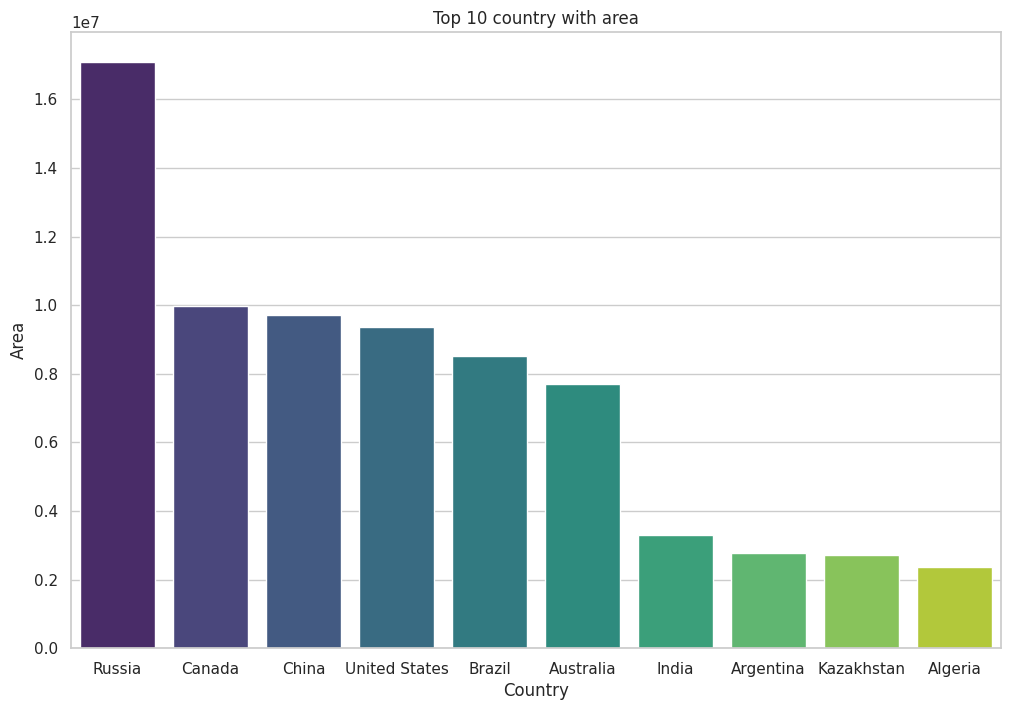

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x="country", y="area", data= pattern_area, palette="viridis")
plt.xlabel("Country")
plt.ylabel("Area")
plt.title("Top 10 country with area")
plt.show()

**Insight(s)**

* Area wise, russia is the largest country followed by Canada, China, USA, Brazil, Australia, and India.

### 7. **Population Density (Country)**

In [ ]:
top5_density= df.nlargest(5, "density")
pattern_density= top5_density[["country", "density"]].reset_index(drop= True)
print(pattern_density)

     country     density
0      Macau  23172.2667
1     Monaco  18234.5000
2  Singapore   8416.4634
3  Hong Kong   6783.3922
4  Gibraltar   5441.5000


In [ ]:
least5_density= df.nsmallest(5, "density")
pattern_least_density= least5_density[["country", "density"]].reset_index(drop= True)
print(pattern_least_density)

            country  density
0         Greenland   0.0261
1  Falkland Islands   0.3105
2    Western Sahara   2.1654
3          Mongolia   2.1727
4           Namibia   3.1092


<ipython-input-32-5165e8124373>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='density', data=pattern_density, palette='viridis')


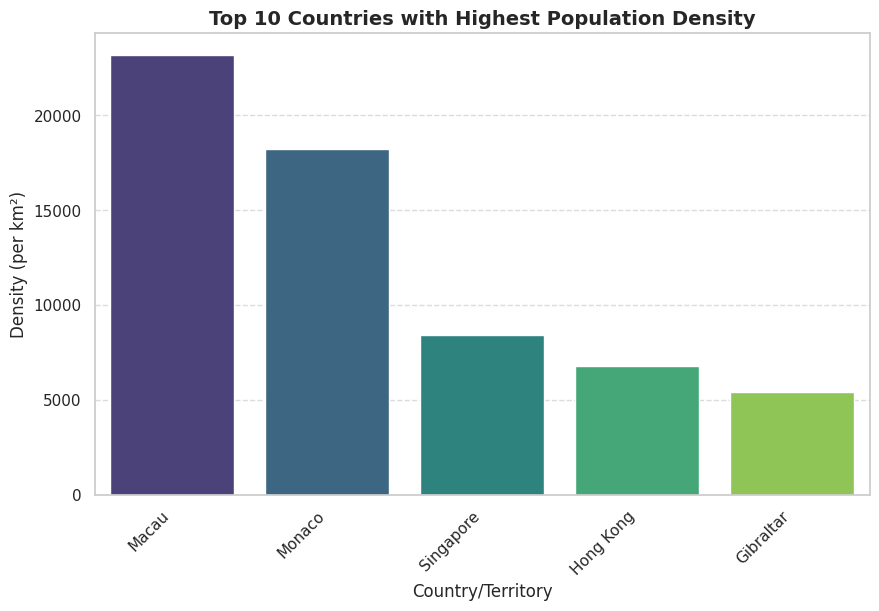

<ipython-input-32-5165e8124373>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='density', data=pattern_least_density, palette='viridis')


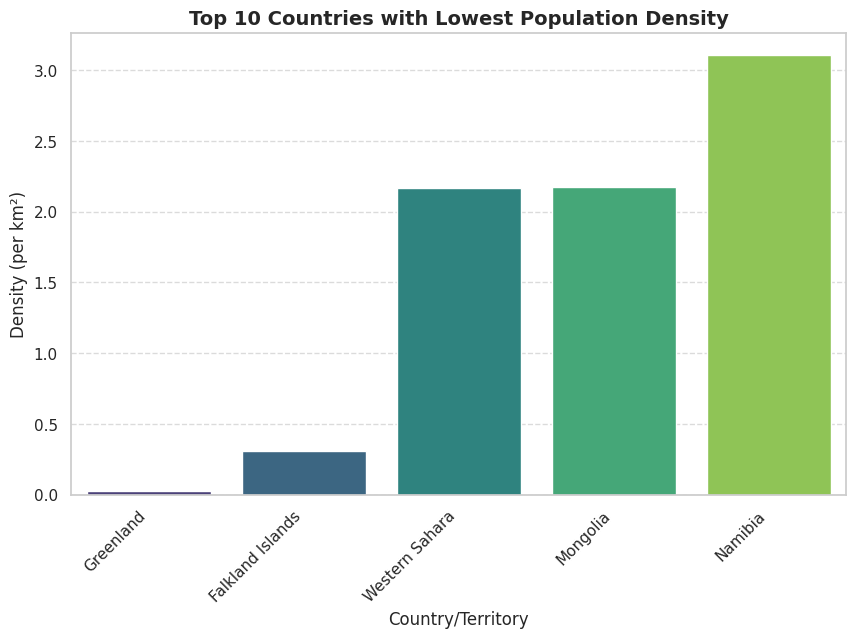

In [ ]:

# Plot for top 10 countries with the highest density
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='density', data=pattern_density, palette='viridis')
plt.title('Top 10 Countries with Highest Population Density', fontsize=14, fontweight='bold')
plt.xlabel('Country/Territory', fontsize=12)
plt.ylabel('Density (per km²)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.show()

# Plot for top 10 countries with the lowest density
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='density', data=pattern_least_density, palette='viridis')
plt.title('Top 10 Countries with Lowest Population Density', fontsize=14, fontweight='bold')
plt.xlabel('Country/Territory', fontsize=12)
plt.ylabel('Density (per km²)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.show()



**Insight(s)**

1. Macau & Monaco Lead in Density – Extremely compact, with 23,172/km² (Macau) & 18,234/km² (Monaco).
2. Singapore & Hong Kong Are High-Density Urban Hubs – Limited land, dense populations.
3. Gibraltar Is Similarly Packed – Small land area leads to 5,441/km² density.




4. Greenland & Falklands – Extremely sparse (0.0261/km², 0.3105/km²).
5. Western Sahara & Mongolia – Vast lands, but low density (~2/km²).
Namibia – 3.1/km².

### 8. **Population growth over decades**

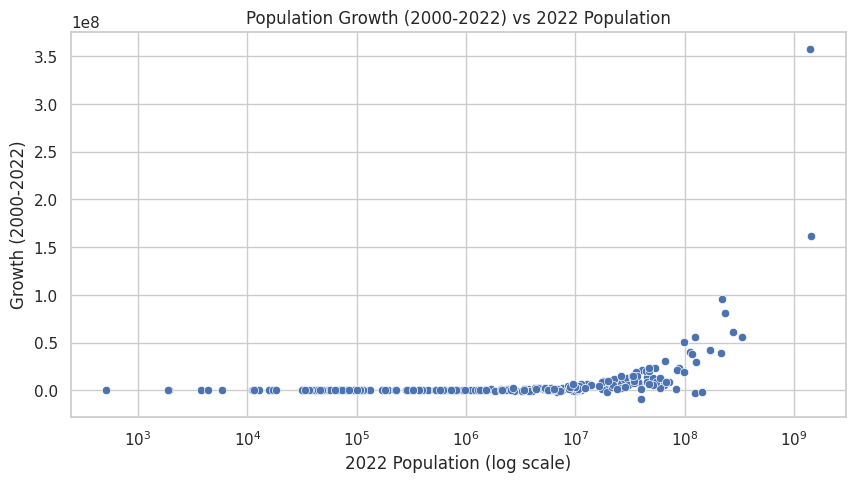

In [ ]:
df['Population Growth (2000-2022)']= df['2022']-df['2000']
plt.figure(figsize=(10, 5))
sns.scatterplot(x='2022', y='Population Growth (2000-2022)', data=df)
plt.xscale('log')
plt.title('Population Growth (2000-2022) vs 2022 Population')
plt.xlabel('2022 Population (log scale)')
plt.ylabel('Growth (2000-2022)')
plt.show()

**Insight(s):**

**1. Relationship between Population Growth and Population Size:**

* Generally, countries with larger populations tend to have a wide range of growth rates. This indicates that population size alone isn't a strong predictor of growth rate.

* There are some outliers with very high growth rates, indicating rapid population increases despite having smaller populations.

**2. Clusters of Countries:**

* The plot shows clusters of countries with similar population sizes and growth rates. This can indicate regional trends or similarities in demographic behavior.

* For example, countries with moderate population sizes and moderate growth rates are densely clustered, suggesting a common trend among such countries.

**3. Outliers:**

* Some countries have significantly higher growth rates compared to others. These outliers could represent countries with unique demographic policies, economic conditions, or other factors driving rapid population growth.

* Similarly, some countries with large populations show varying growth rates, indicating diverse population dynamics.

### 9. **Population density analysis (Continent)**

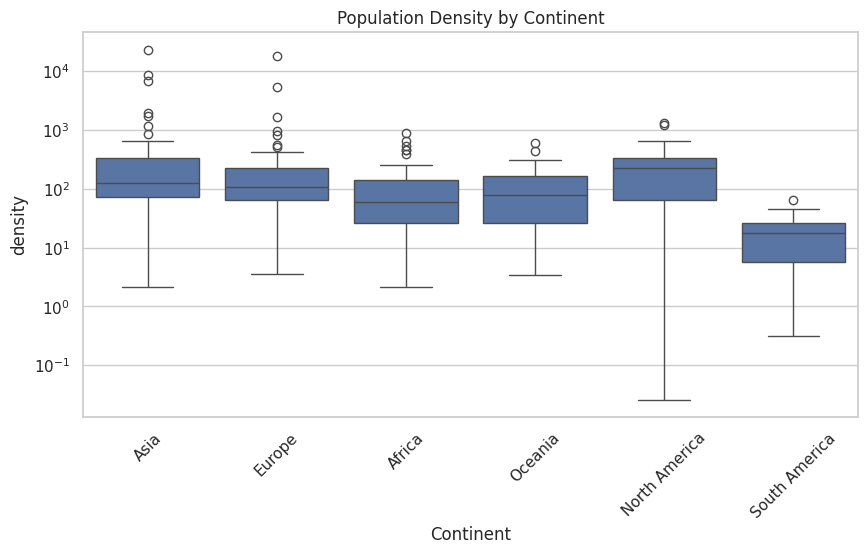

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Continent', y='density', data=df)
plt.yscale('log')
plt.title('Population Density by Continent')
plt.xticks(rotation=45)
plt.show()

**Insight(s):**

**1. Population Distribution:**

* Most countries fall in the lower range of population sizes, with a few notable outliers having significantly larger populations.

* The logarithmic scale helps visualize a wide range of population sizes, revealing these differences clearly.

**2. Population Growth:**

* Most countries exhibit moderate population growth over the 22-year period.

* There are some outliers with exceptionally high growth rates, indicating rapid population increases in these countries.

**3. Clusters of Countries:**

* The scatter plot shows clusters of countries with similar population sizes and growth rates, suggesting regional trends or similarities in demographic behavior.

**4. Outliers:**

* A few countries with very high growth rates stand apart, representing unique demographic policies, economic conditions, or other factors driving rapid growth.

* Similarly, some countries with large populations show varying growth rates, indicating diverse population dynamics.

### **10. Total population by continent in 2022**

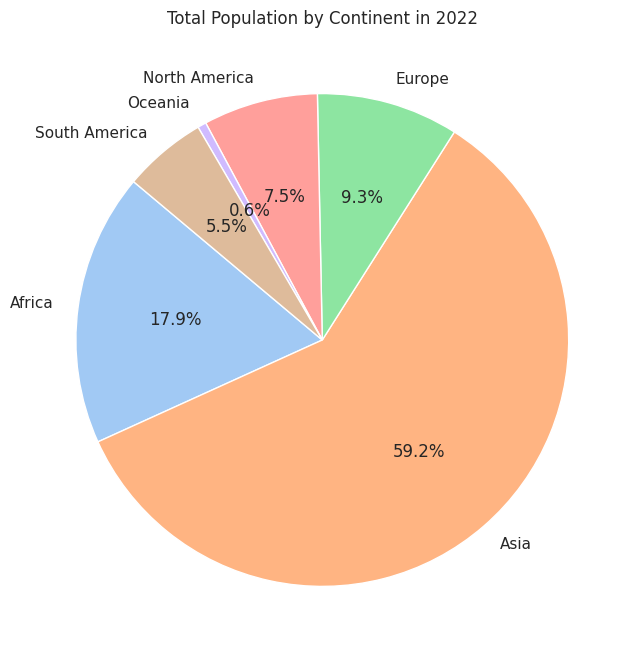

In [ ]:
continent_population = df.groupby('Continent')['2022'].sum()
plt.figure(figsize=(8, 8))
plt.pie(continent_population, labels=continent_population.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Total Population by Continent in 2022')
plt.show()

**Insight(s):**

* Asia contributes the highest in the world population percentage.
* Africa comprises around 17.9% which is followed by Europe.
* Oceania has the lowest population among all.

# **Code [Forecasting/Time series analysis]**

## **1. Feature Engineering & Data Pre-processing**

### * There is no missing value in the data set

### **Detecting & Remove Outlier**

In [ ]:
# Drop unwanted columns
df= df.drop(["Population Growth (2000-2022)","Rank"],axis=1)


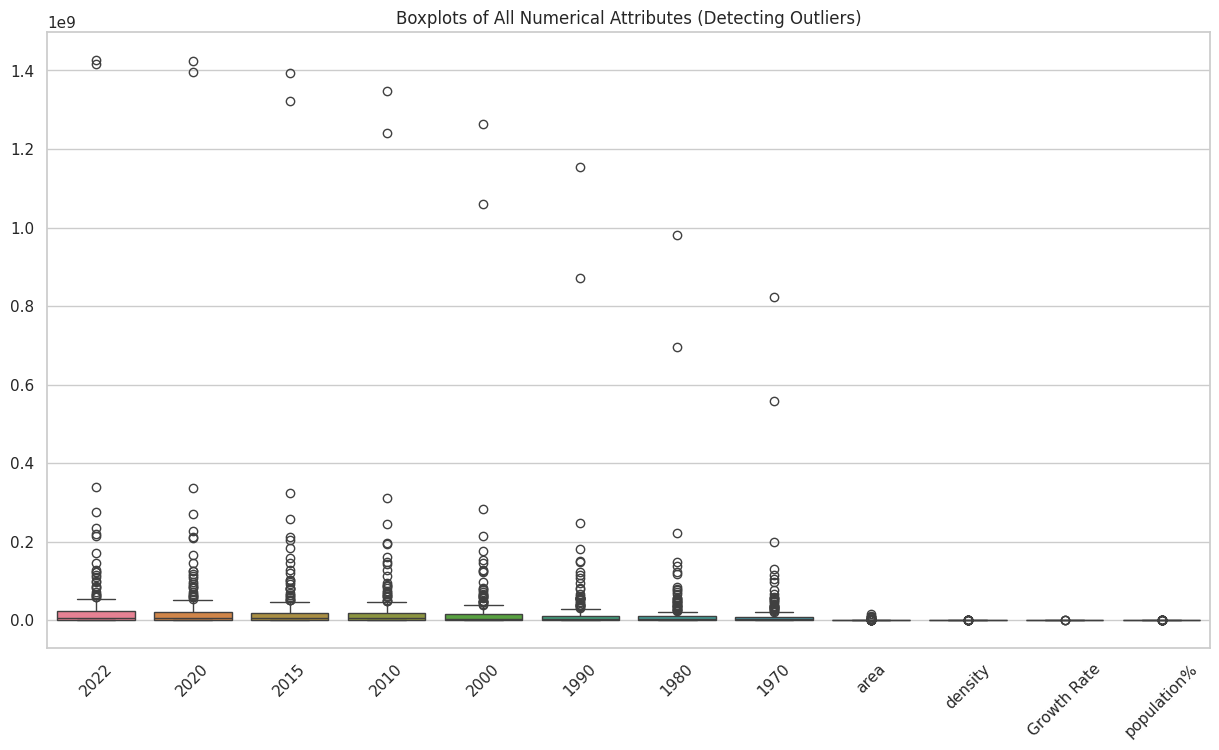

In [ ]:


# Select only numerical columns
numeric_cols= df.select_dtypes(include=['number'])

# Set figure size
plt.figure(figsize= (15, 8))

# Create multiple boxplots
sns.boxplot(data= numeric_cols)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title
plt.title('Boxplots of All Numerical Attributes (Detecting Outliers)')

# Show plot
plt.show()


In [ ]:
# Create a dictionary to store the count of outliers for each column
outlier_counts= {}

# Loop through each numeric column
for column in numeric_cols:
    # Calculate Q1 and Q3
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)

    # Calculate IQR
    IQR= Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3+1.5*IQR

    # Identify outliers
    outliers= df[(df[column]<lower_bound)|(df[column]>upper_bound)]

    # Handle outliers (filtered dataset without outliers)
    df_no_outliers= df[~((df[column]<lower_bound)|(df[column]>upper_bound))]

    # Count and store the number of outliers
    outlier_count= outliers.shape[0]
    outlier_counts[column]= outlier_count

    # Print the number of outliers for each column
    print(f"Number of outliers in {column}: {outlier_count}")

# Display the overall count of outliers for each column
print("\nOverall Count of Outliers:")
print(outlier_counts)


Number of outliers in 2022: 25
Number of outliers in 2020: 26
Number of outliers in 2015: 27
Number of outliers in 2010: 26
Number of outliers in 2000: 29
Number of outliers in 1990: 31
Number of outliers in 1980: 32
Number of outliers in 1970: 29
Number of outliers in area: 28
Number of outliers in density: 22
Number of outliers in Growth Rate: 3
Number of outliers in population%: 25

Overall Count of Outliers:
{'2022': 25, '2020': 26, '2015': 27, '2010': 26, '2000': 29, '1990': 31, '1980': 32, '1970': 29, 'area': 28, 'density': 22, 'Growth Rate': 3, 'population%': 25}


In [ ]:
print(f"Data set shape before handling outliners: {df.shape}")
print(f"Data set shape after handling outliners: {df_no_outliers.shape}")

Data set shape before handling outliners: (234, 15)
Data set shape after handling outliners: (209, 15)


### **Feature selection**

In [ ]:
df_final= df_no_outliers.drop(['Capital'],axis=1)
df_final

,country,Continent,2022,2020,2015,2010,2000,1990,1980,1970,area,density,Growth Rate,population%
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,Western Sahara,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,Yemen,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,Zambia,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


## **2. Analysis**

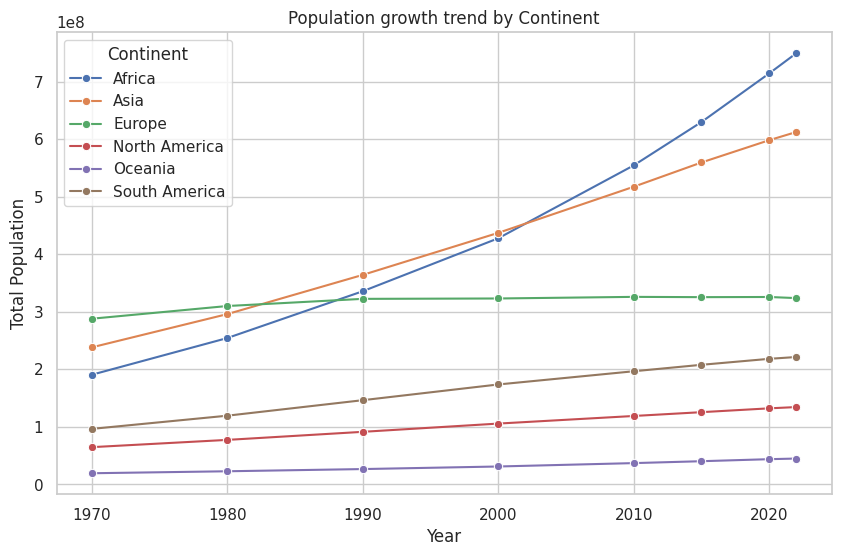

In [ ]:
years=['2022','2020','2015','2010','2000','1990','1980','1970']
df_long= df_final.melt(id_vars=['Continent','area','density','Growth Rate','population%'], value_vars=years, var_name='Year',value_name='Population')

# Ensure the year is an int
df_long['Year']= df_long['Year'].astype(int)

# Aggregate population by continent
df_continent= df_long.groupby(['Continent','Year'])['Population'].sum().reset_index()

# plot population trends for each continent
plt.figure(figsize=(10,6))
sns.lineplot(data=df_continent, x='Year',y='Population',hue='Continent',marker='o')
plt.title("Population growth trend by Continent")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend(title="Continent")
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Forecast future population (2030, 2040, 2050) for each continent
future_years= [2030, 2040, 2050]
forecast_results= []

for continent in df_continent['Continent'].unique():
    subset= df_continent[df_continent['Continent'] == continent].set_index('Year')

    # Fit ARIMA model (p=1, d=1, q=1)
    model= ARIMA(subset['Population'], order=(1, 1, 1))
    model_fit= model.fit()

    # Forecast for future years
    forecast= model_fit.forecast(steps=len(future_years))

    # Store results
    for year, pop in zip(future_years, forecast):
        forecast_results.append([continent, year, pop])

# Convert forecast results to DataFrame
df_forecast= pd.DataFrame(forecast_results, columns=['Continent', 'Year', 'Predicted Population'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

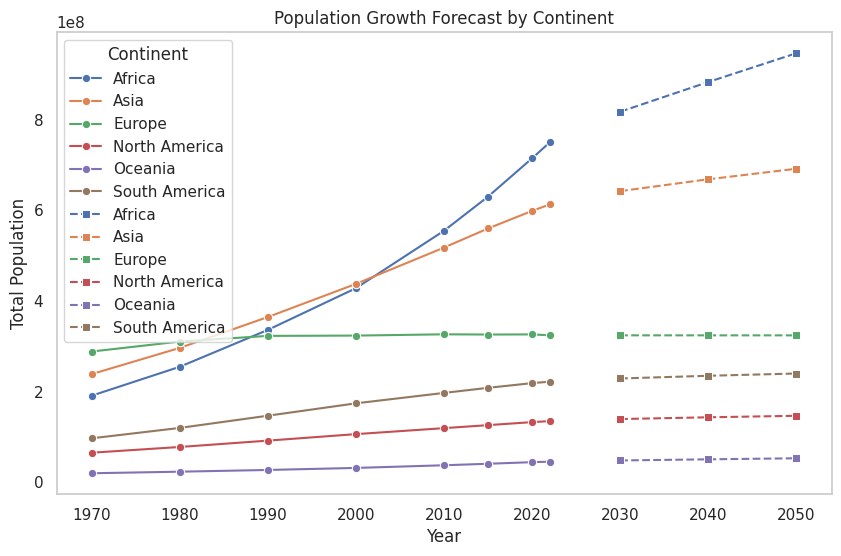

In [ ]:
# Plot forecast
plt.figure(figsize=(10, 6))

# Historical data
sns.lineplot(data=df_continent, x='Year', y='Population', hue='Continent', marker='o')

# Forecasted data
sns.lineplot(data=df_forecast, x='Year', y='Predicted Population', hue='Continent', marker='s', linestyle='dashed')

plt.title("Population Growth Forecast by Continent")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.grid()
plt.legend(title="Continent")
plt.show()


In [ ]:
df_forecast_pivot= df_forecast.pivot(index="Continent", columns="Year", values="Predicted Population")
display(df_forecast_pivot)


Year,2030,2040,2050
Continent,,,
Africa,8.171126e+08,8.826753e+08,9.461730e+08
Asia,6.419448e+08,6.680854e+08,6.913115e+08
Europe,3.237842e+08,3.237380e+08,3.237181e+08
North America,1.390632e+08,1.429561e+08,1.462787e+08
Oceania,4.770629e+07,5.019860e+07,5.252702e+07
South America,2.285861e+08,2.345401e+08,2.395450e+08
